# Distribution Visualization 



This notebook is used for visualizing distribution of PD vs NON-PD accross mPower Version 1 (filtered healthcodes), mPower Version 2, mPower Passive Data. Features of median and maximum collapsed PDKIT features will be used. Using each features we will try to analyze separation between each PD vs non-PD.

In [9]:
## package imports ##
%load_ext autoreload
%autoreload 2


import sys
import os
import warnings
sys.path.append("../../src")
warnings.simplefilter("ignore")
from utils import preprocessing_utils as process
from utils import munging_utils as query
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import synapseclient as sc
import seaborn as sns
import matplotlib.pyplot as plt
import utils
sns.set_style("dark")
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
def plot_PDvsNONPD_feature_distribution(data):
    
    dataV1 = data[data["version"] == "mpower_v1"]
    dataV2 = data[data["version"] == "mpower_v2"]
    dataPassive = data[data["version"] == "mpower_passive"]
    for feat in [feat for feat in data.columns if "." in feat]:
        ax_count = 0
        fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
        for data in [dataV1, dataV2, dataPassive]:
            PD = data[data["PD"] == 1][feat].dropna()
            NONPD = data[data["PD"] == 0][feat].dropna()
            sns.distplot(PD, label = "PD", kde_kws={"shade": True}, hist = False, ax = axes[ax_count])
            sns.distplot(NONPD, label = "NONPD", kde_kws={"shade": True}, hist = False, ax = axes[ax_count])
            axes[0].set_title("Version 1")
            axes[0].grid()
            axes[1].set_title("Version 2")
            axes[1].grid()
            axes[2].set_title("Passive")
            axes[2].grid()
            ax_count += 1
        plt.show()
        
def plot_pd_distb(data):
    """
    function to plot pd distribution of gender and age
    parameter: data -> grouped data
    returns matplotlib plot object
    """
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 10))


    sns.countplot(data["gender"], hue = data["PD"], ax = axes[0,0])
    axes[0,0].legend()
    axes[0,0].set_title("Gender Counts separated by its PD condition")
    axes[0,0].grid()


    sns.boxplot(x = data["PD"], y = data["age"], ax = axes[0,1])
    axes[0,1].set_title("Boxplot of Age Distribution")
    axes[0,1].grid()
    
    
    sns.boxplot(y = data["age"], x = data["version"], ax = axes[0,2], order = ["mpower_v1", "mpower_v2", "mpower_passive"])
    axes[0,2].set_title("Age Distribution")
    axes[0,2].grid()

    sns.countplot(data["version"], hue = data["gender"], ax = axes[1,0], order = ["mpower_v1", "mpower_v2", "mpower_passive"])
    axes[1,0].legend()
    axes[1,0].set_title("Gender Accross Versions")
    axes[1,0].grid()

    sns.countplot(data["version"], hue = data["PD"], ax = axes[1,1], order = ["mpower_v1", "mpower_v2", "mpower_passive"])
    axes[1,1].set_title("PD Subject Accross Versions")
    axes[1,1].grid()
    
    fig.tight_layout()
    
    plt.show()

In [40]:
## syn login
syn = sc.login()

data = query.get_file_entity("syn21281633")
healthcode_list_v1 = query.get_file_entity("syn8381056").index
dataV1 = data[data["healthCode"].isin(healthcode_list_v1)].reset_index(drop = True)
dataV2 = data[data["version"] == "mpower_v2"]
dataV2 = dataV2[dataV2["age"] >= dataV1["age"].min()].reset_index(drop = True)
dataPassive = data[data["version"] == "mpower_passive"]
dataPassive = dataPassive[dataPassive["age"] >= dataV1["age"].min()].reset_index(drop = True)
data = pd.concat([dataV1, dataV2, dataPassive]).reset_index()
data = process.addFeatures().transform(data)
max_grouped_data = process.collapseFeatures(aggregation_type = "max").transform(data)
median_grouped_data = process.collapseFeatures(aggregation_type = "median").transform(data)

Welcome, aryton tediarjo!



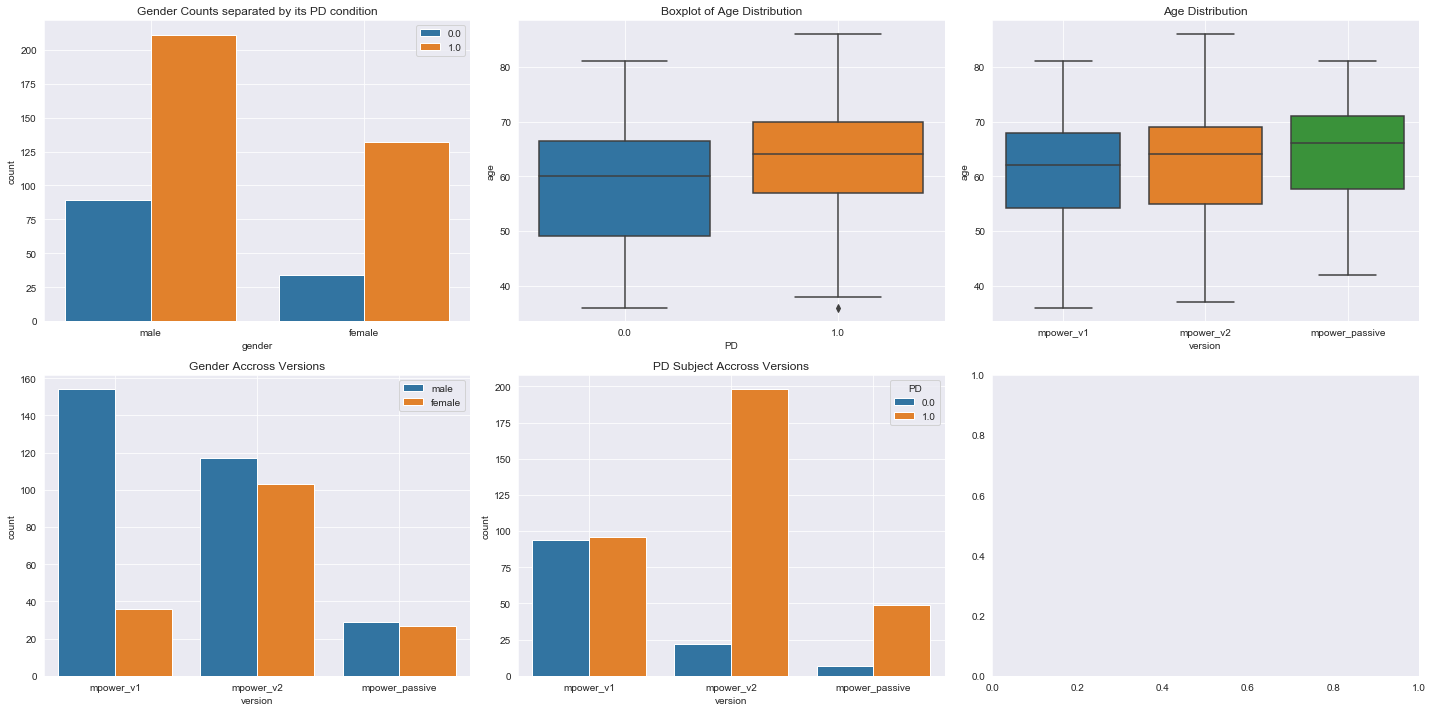

In [47]:
plot_pd_distb(max_grouped_data)

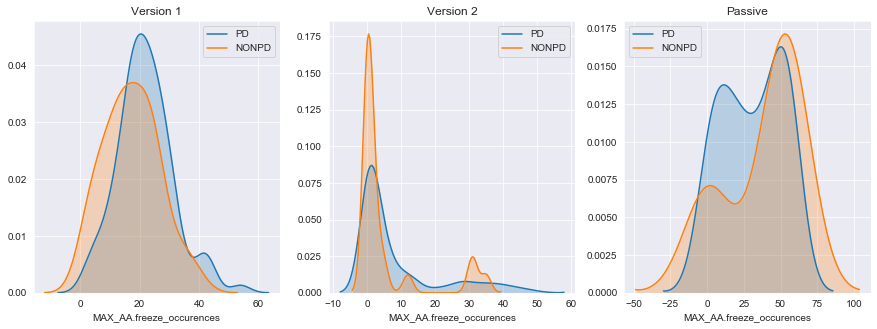

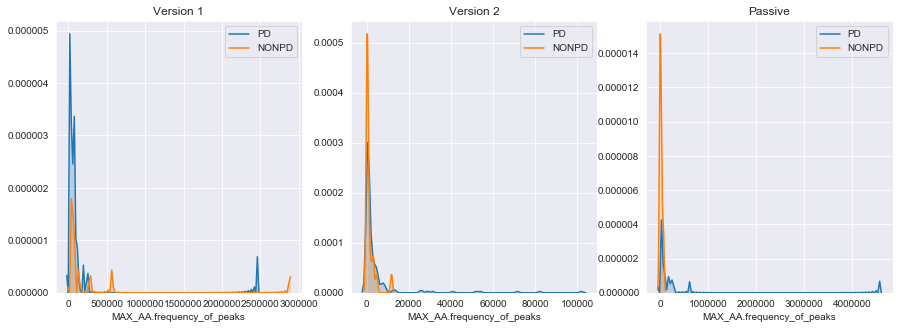

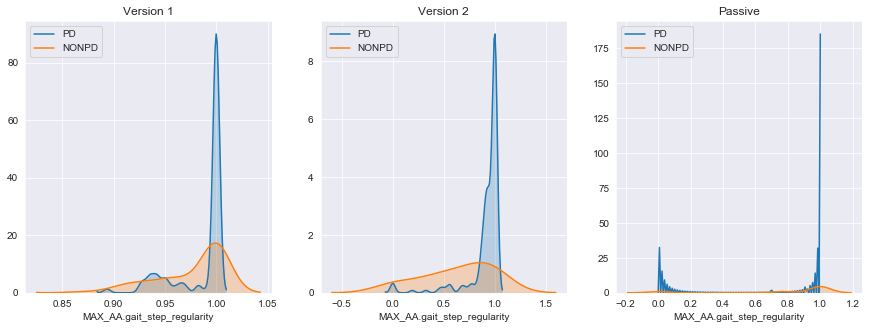

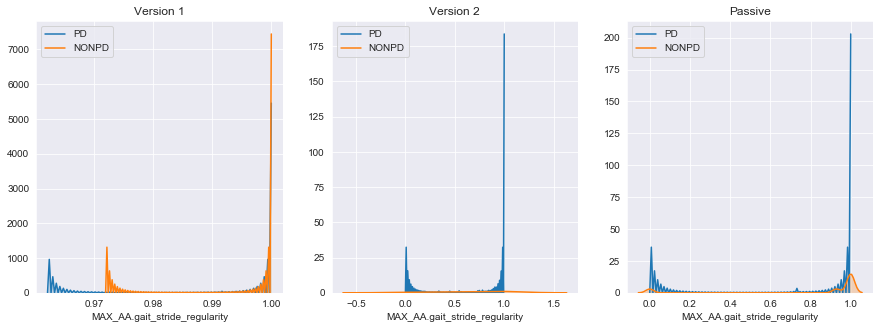

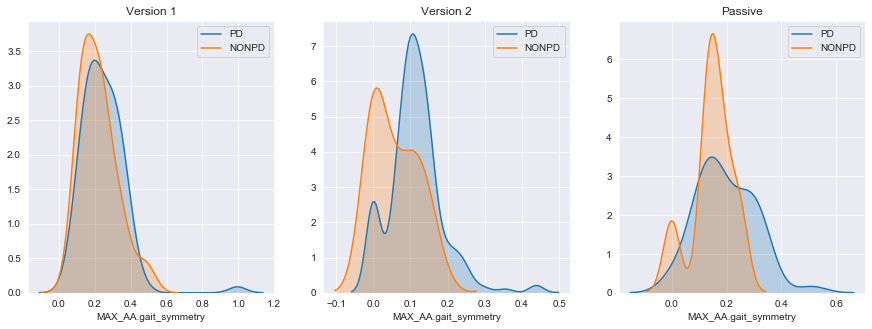

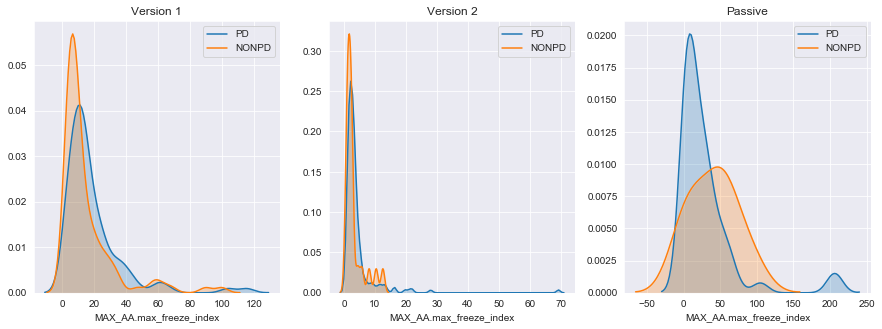

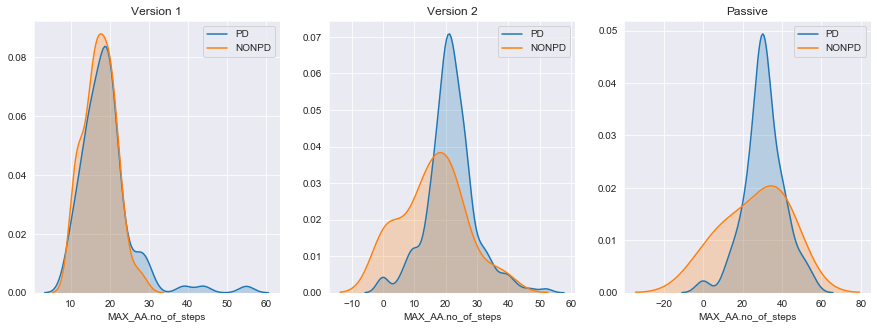

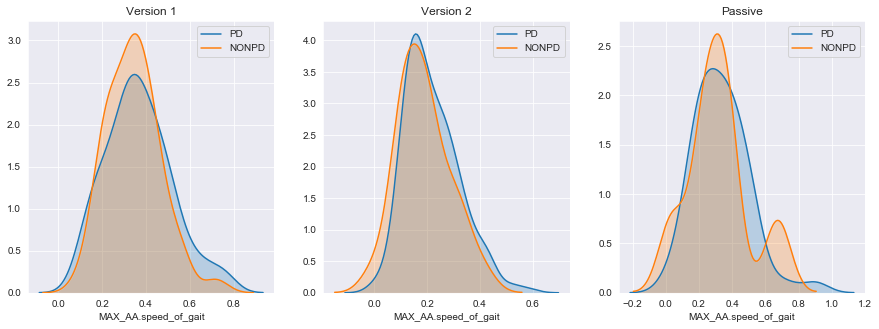

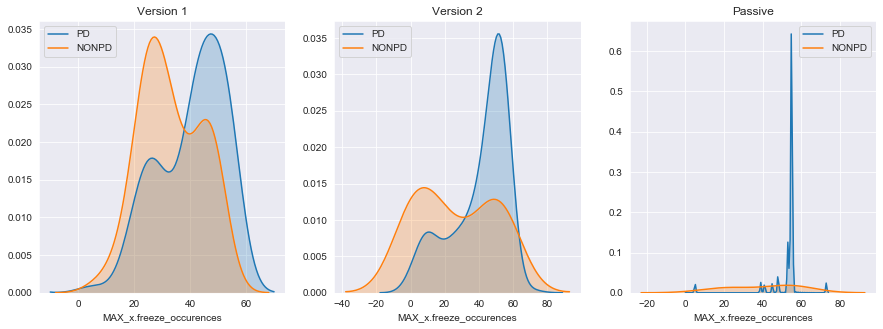

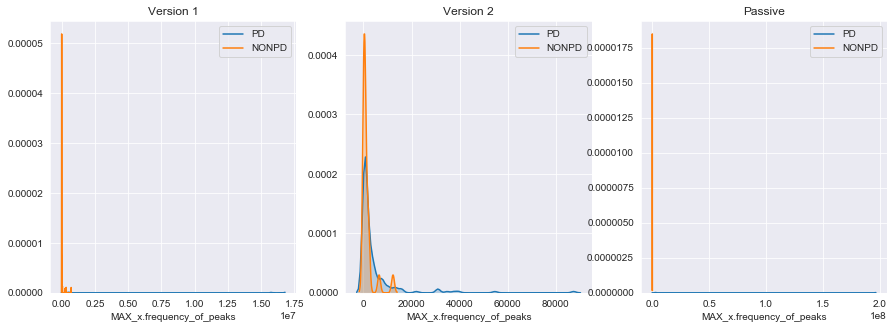

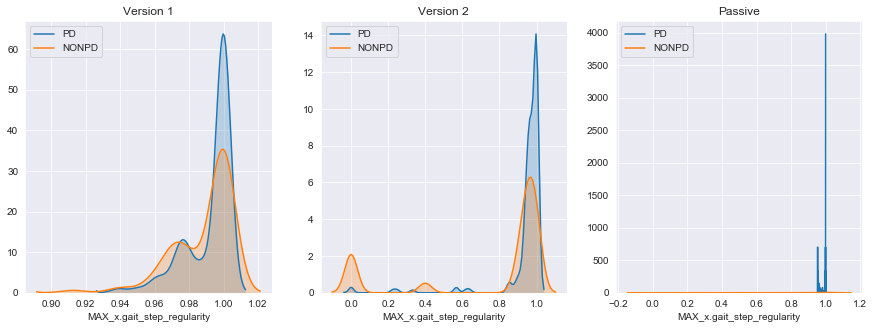

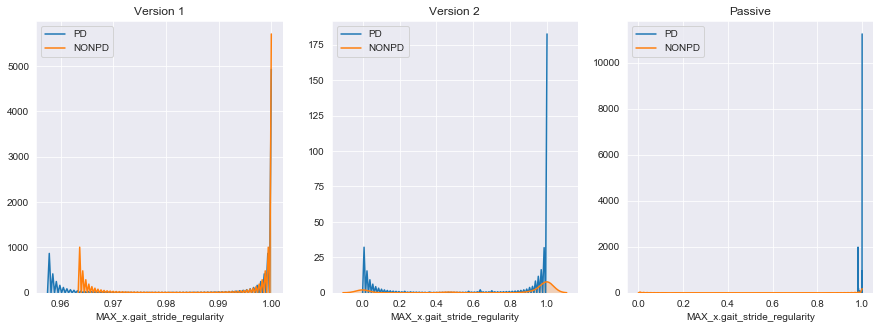

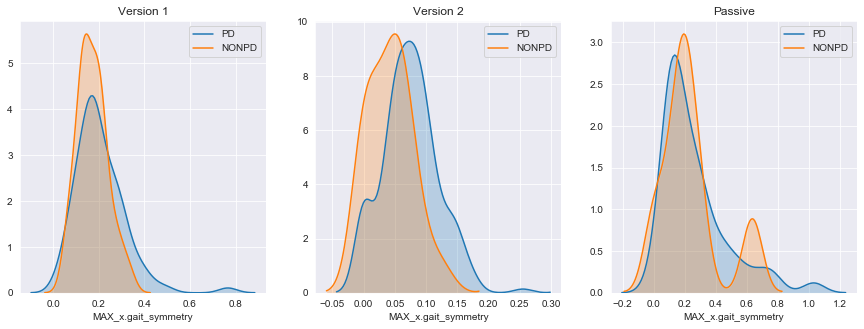

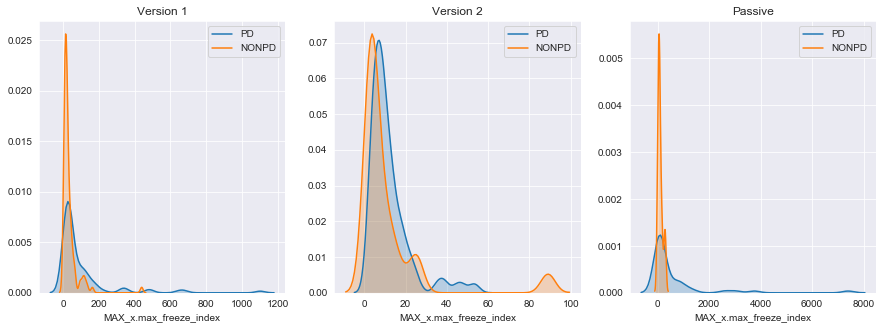

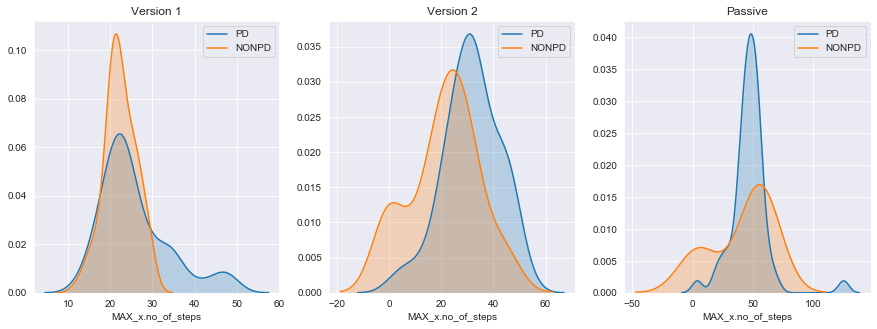

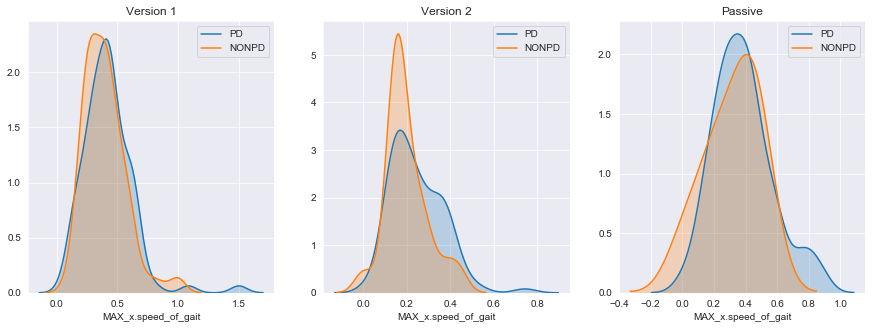

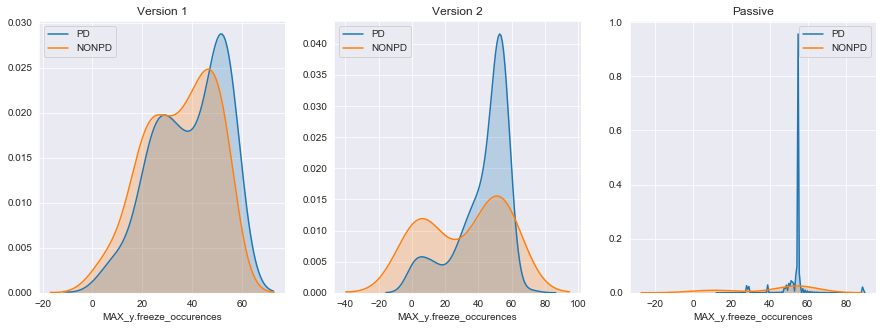

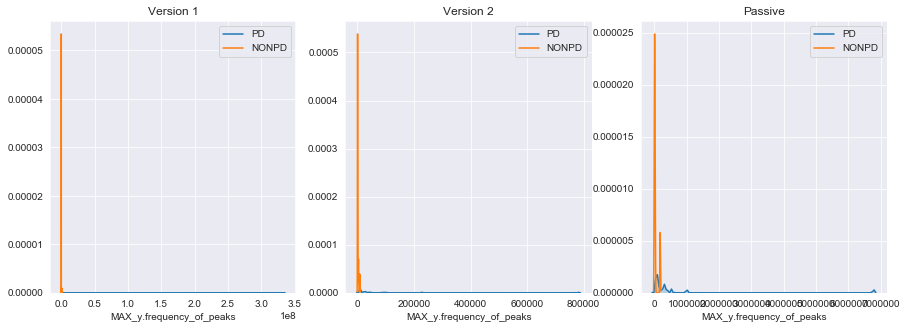

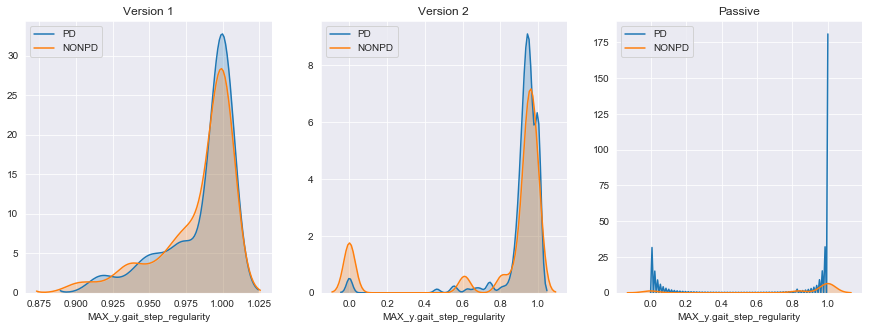

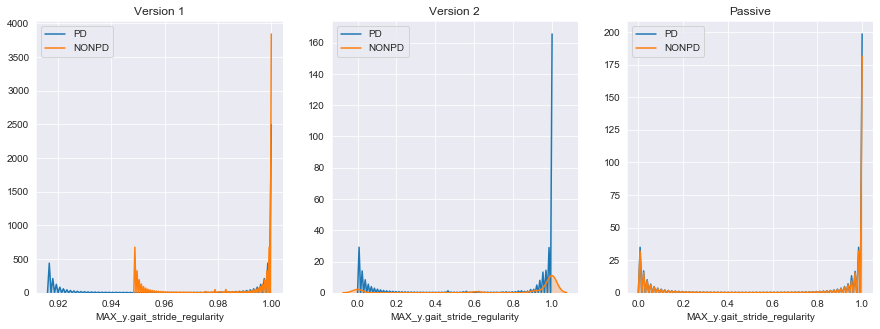

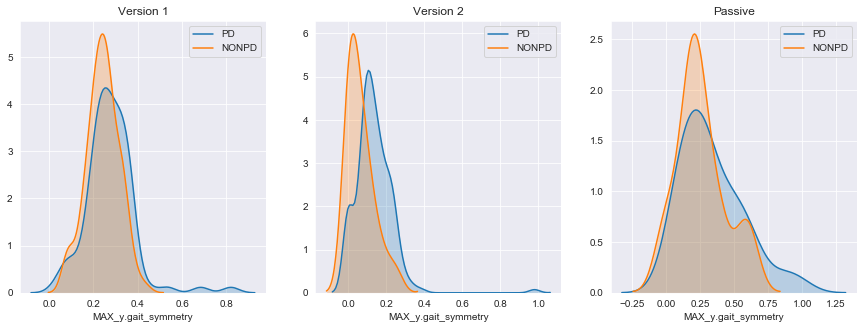

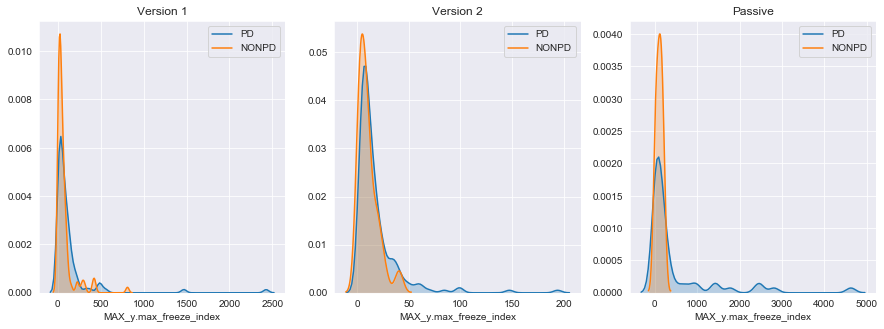

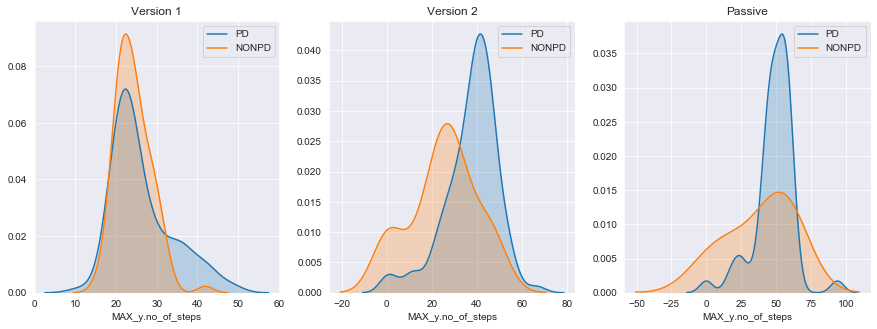

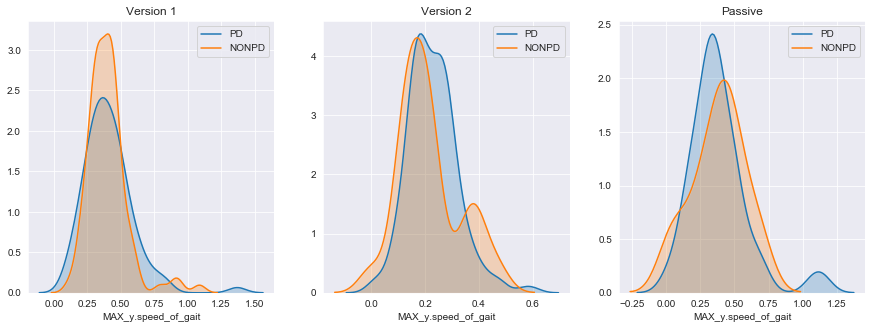

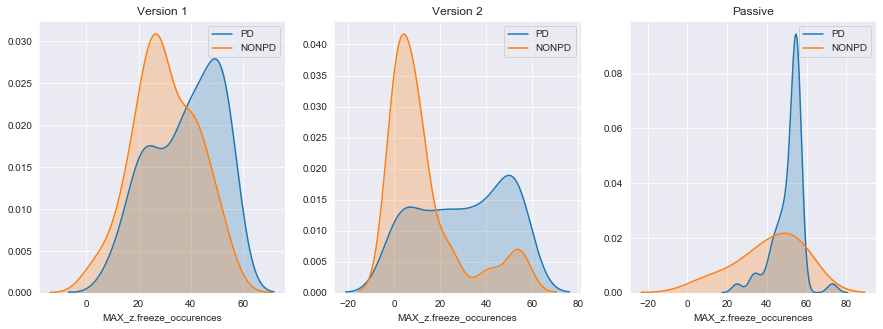

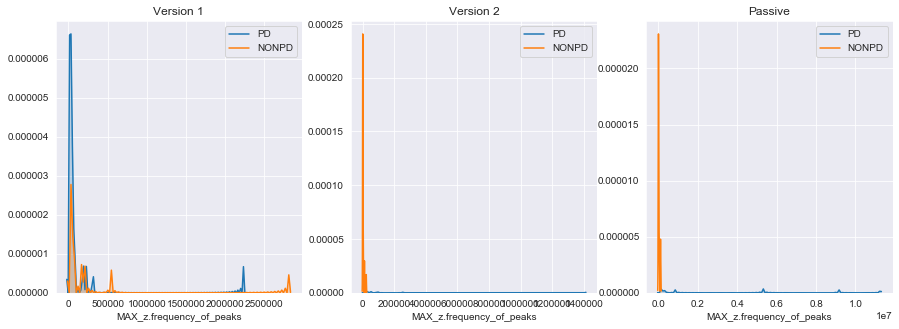

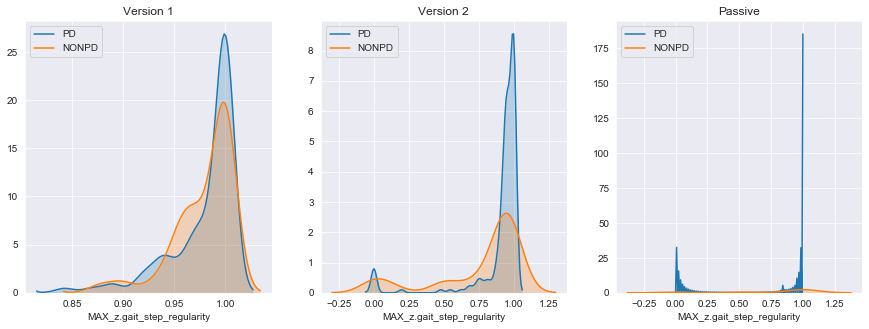

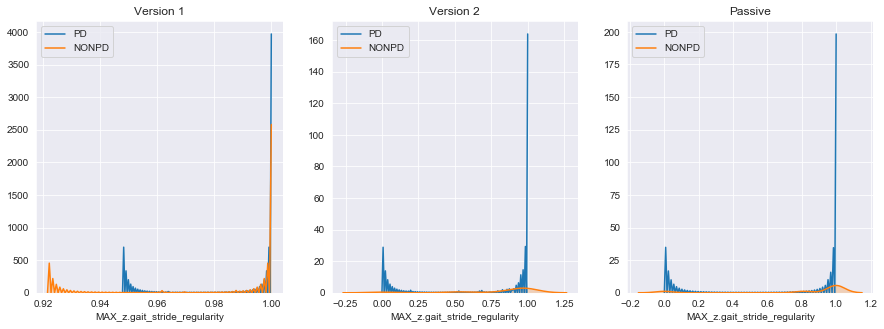

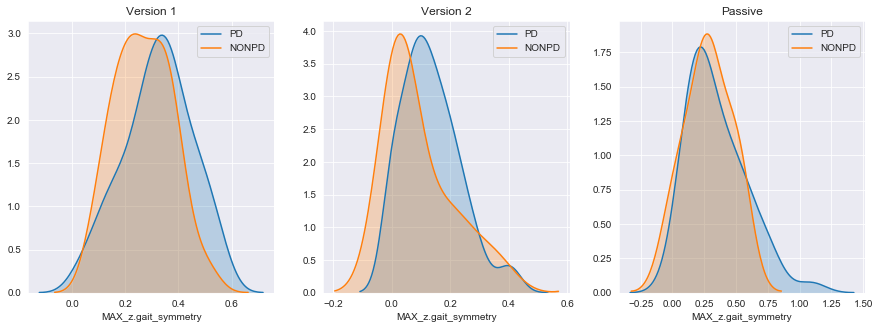

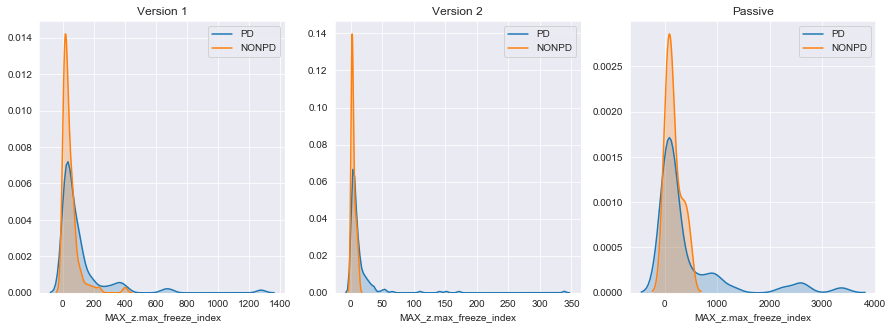

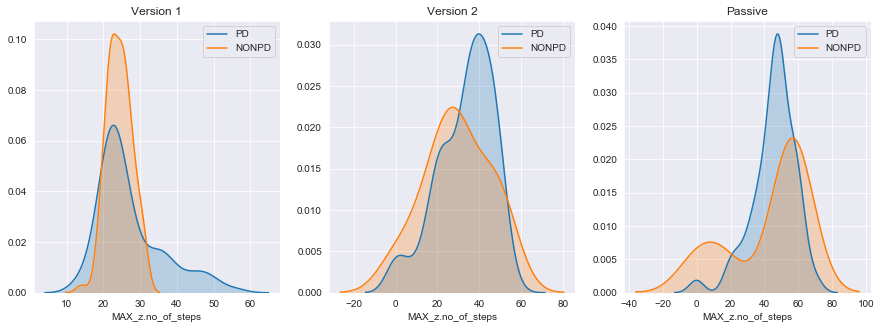

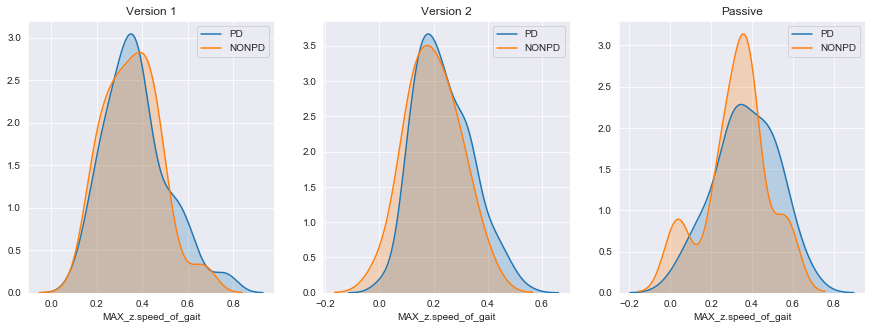

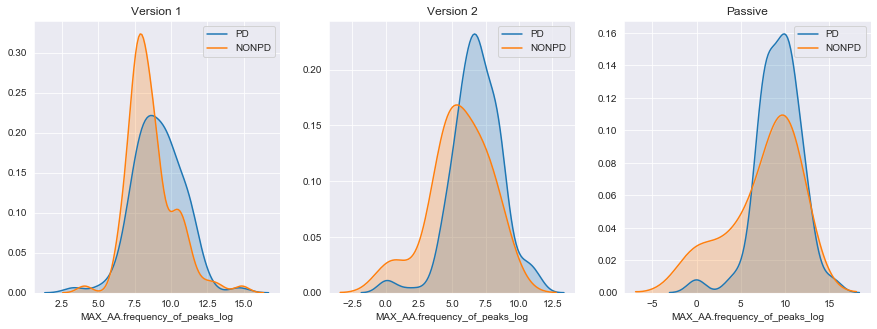

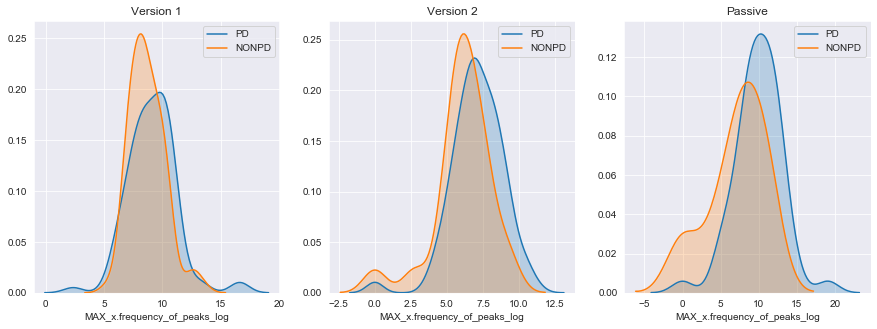

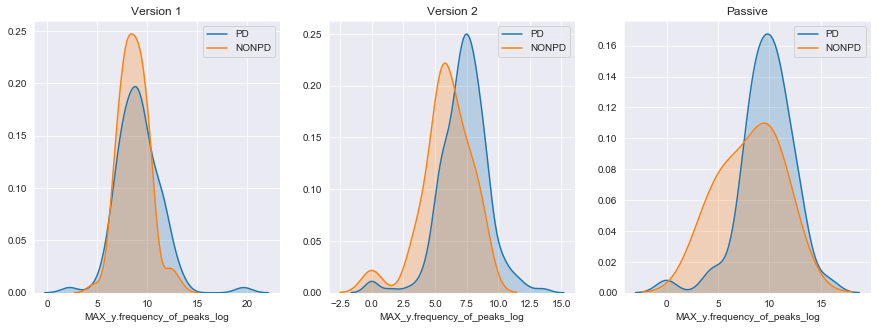

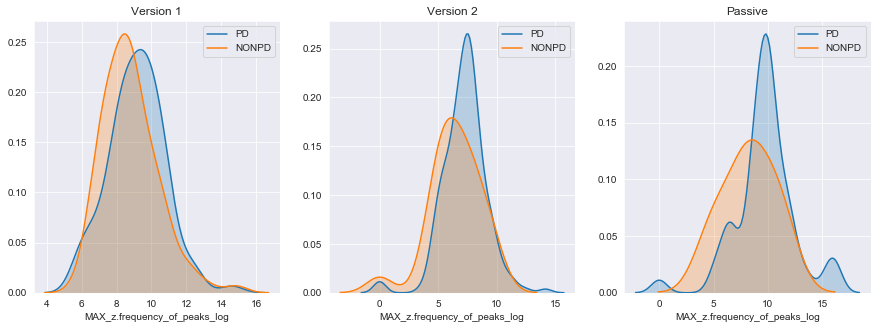

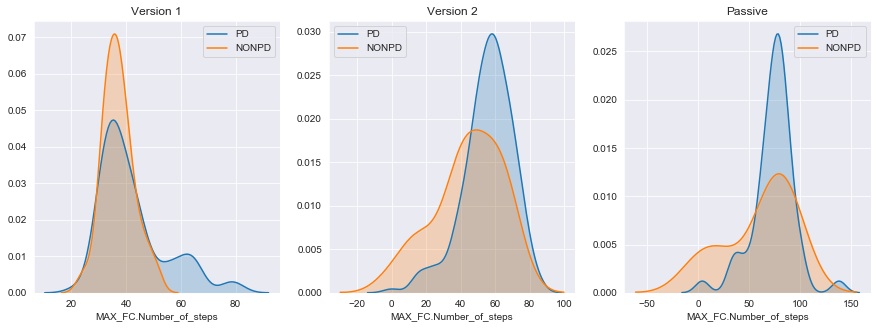

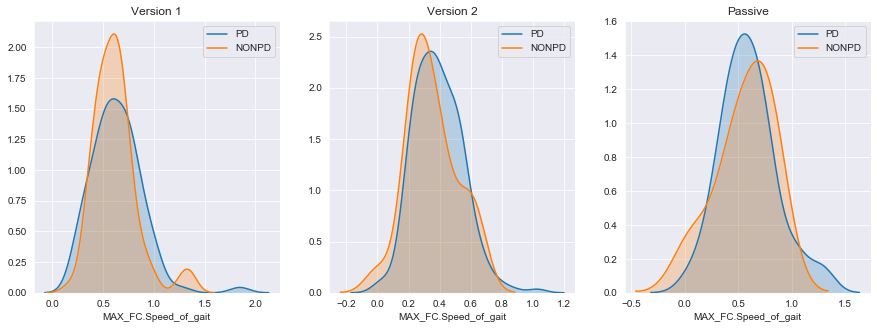

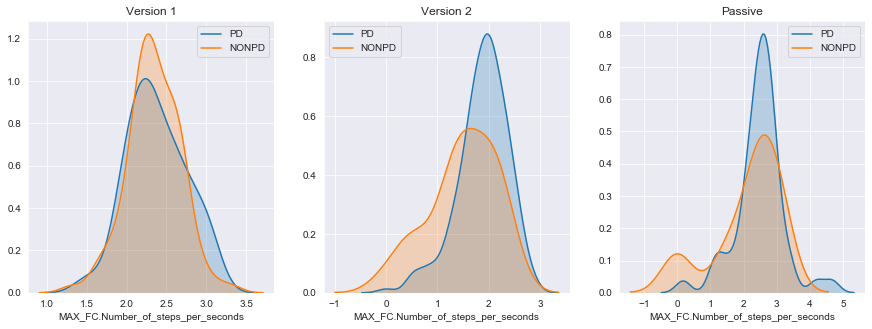

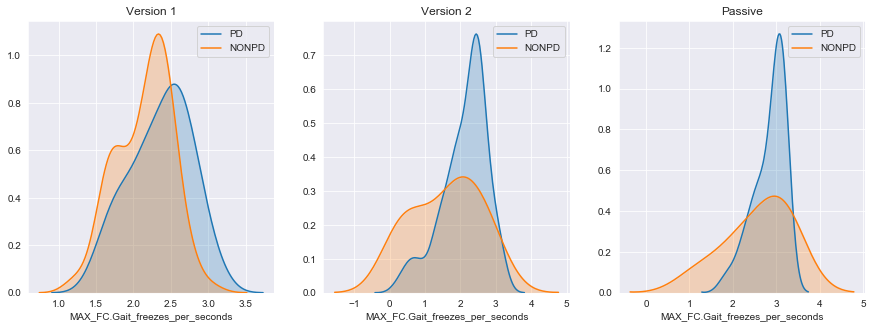

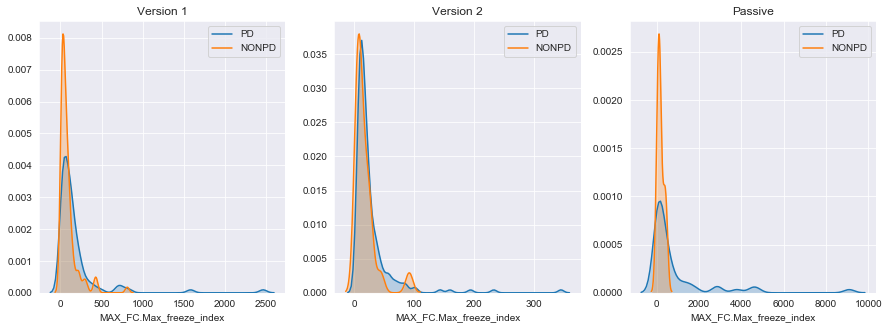

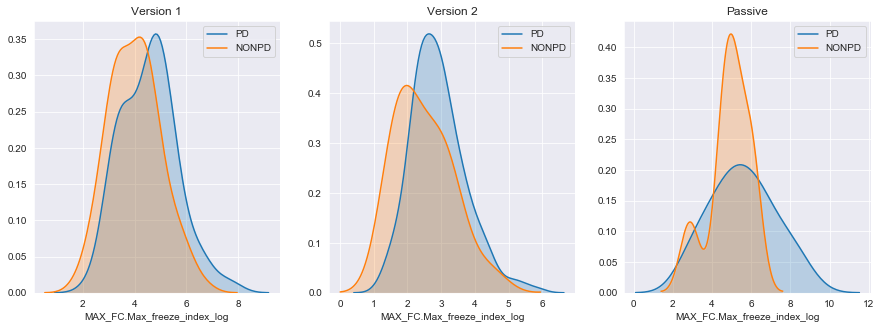

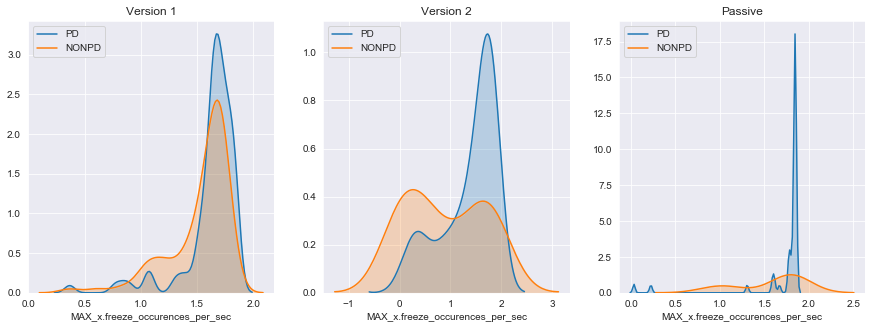

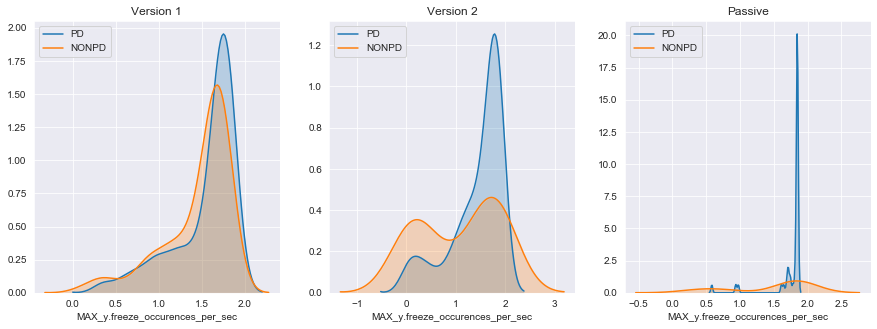

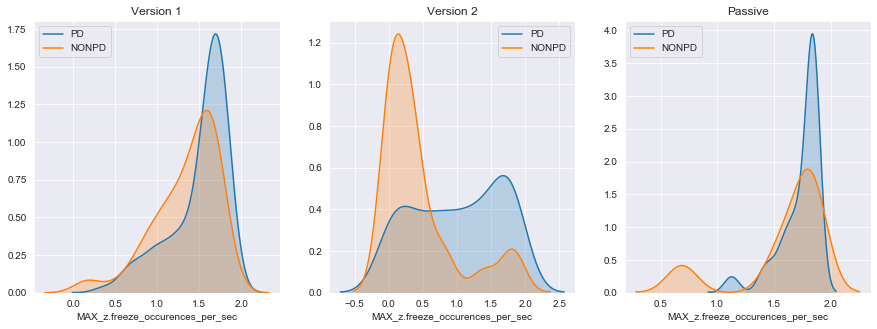

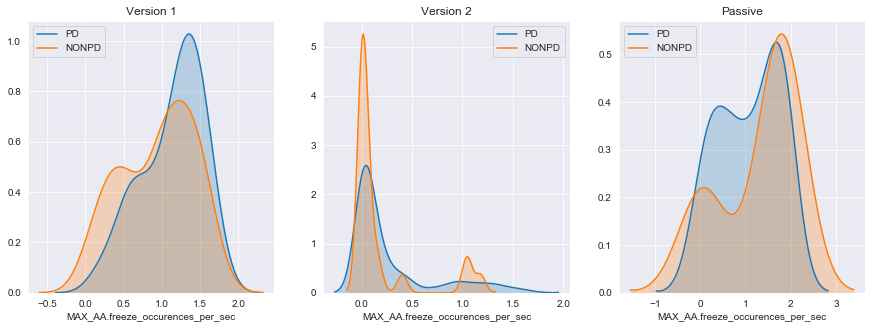

In [53]:
plot_PDvsNONPD_feature_distribution(max_grouped_data)

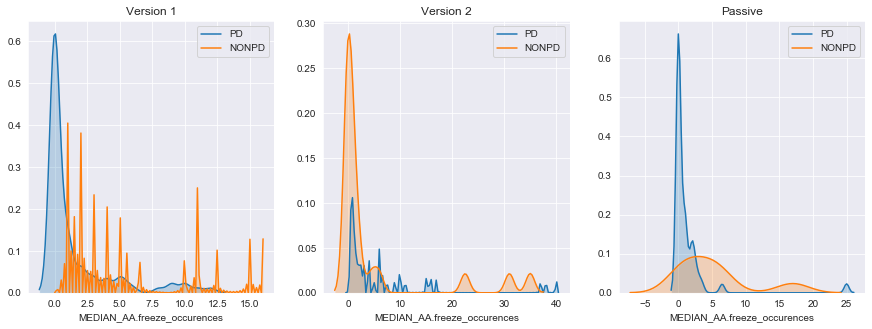

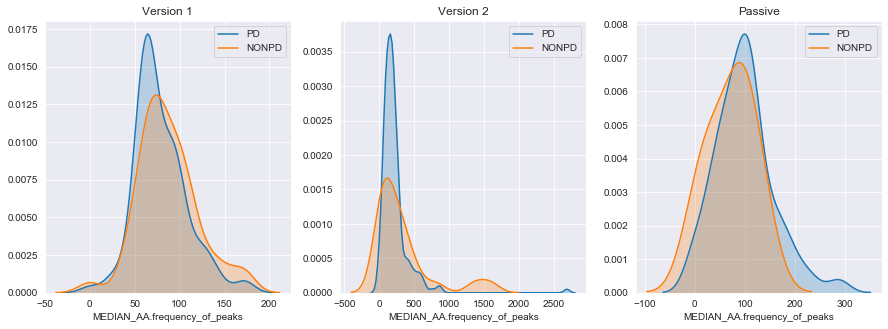

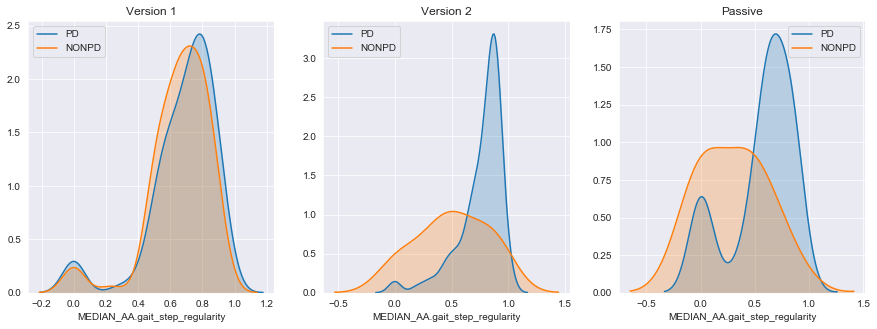

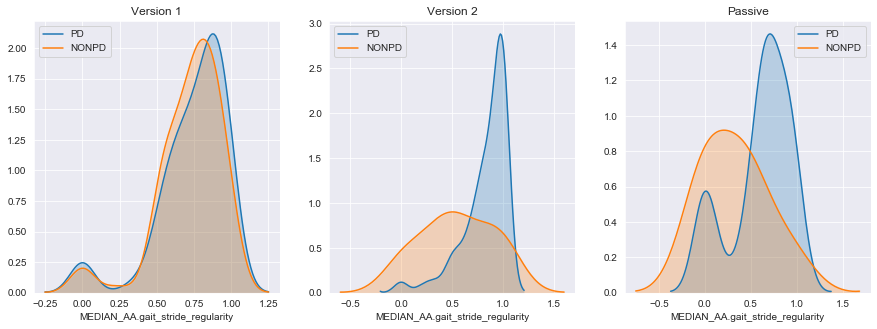

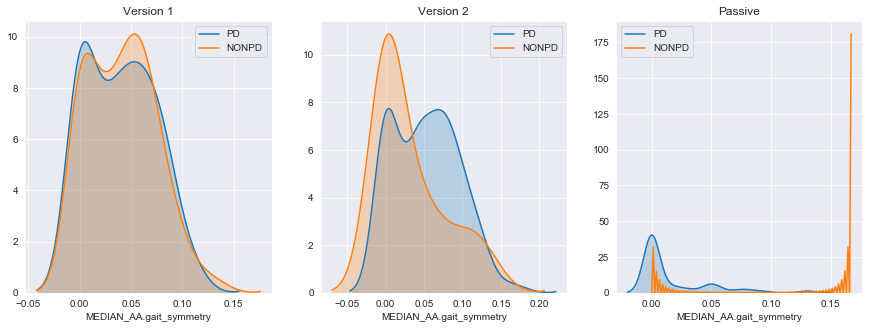

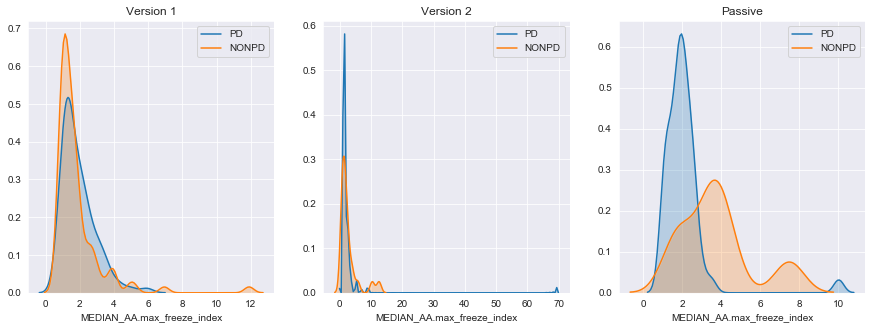

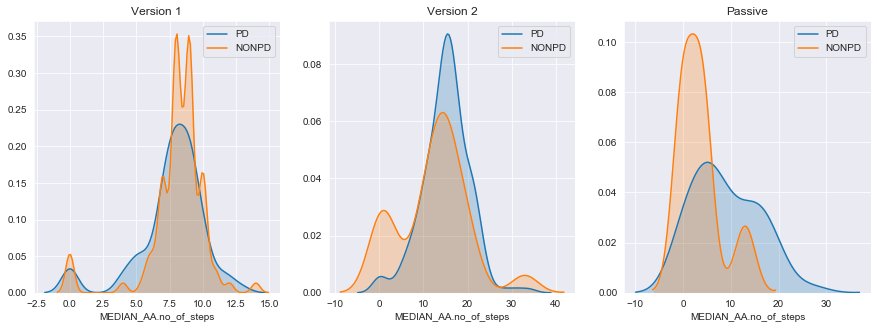

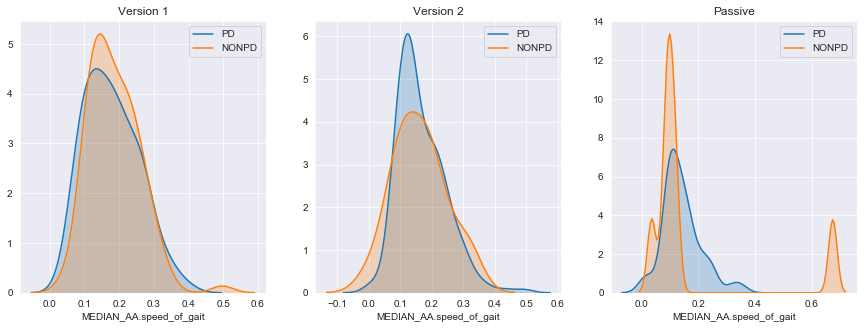

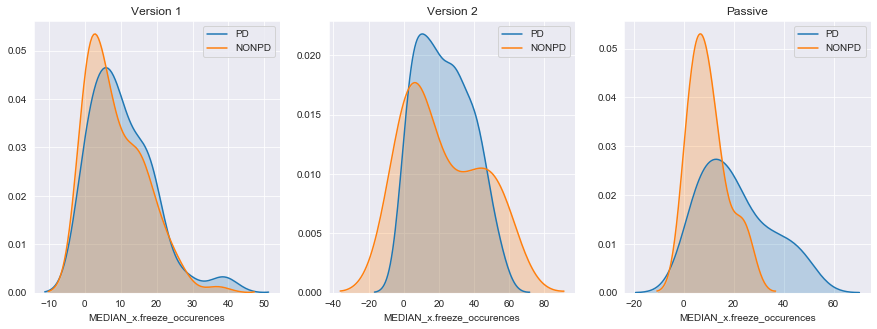

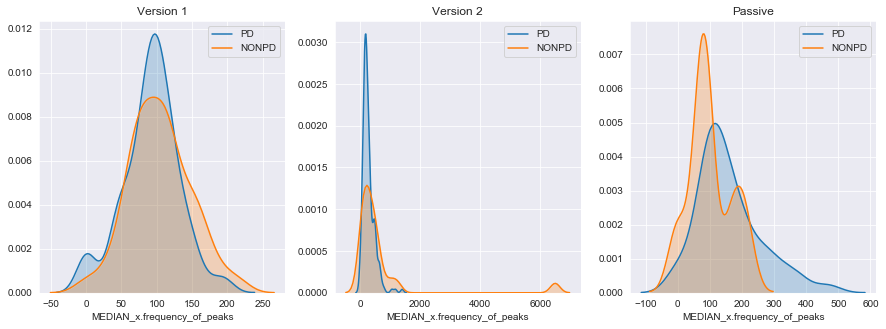

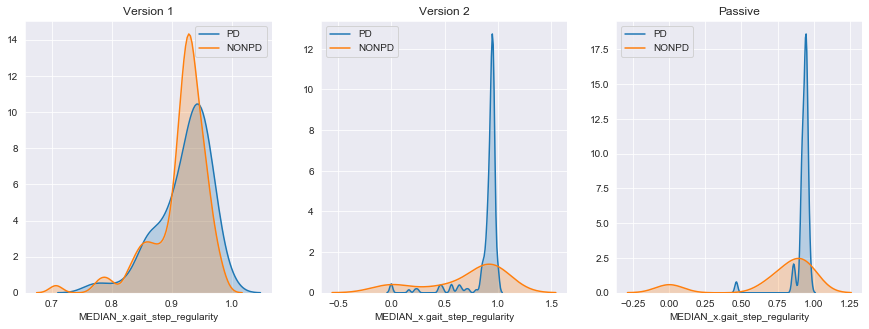

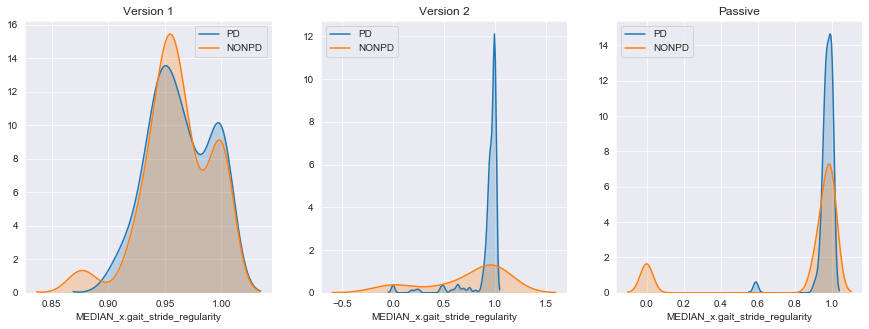

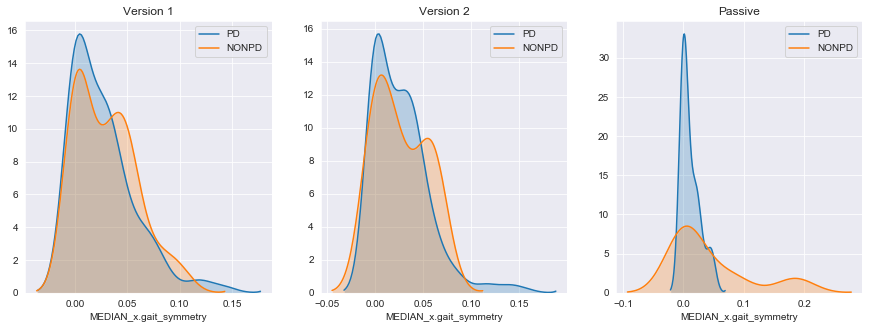

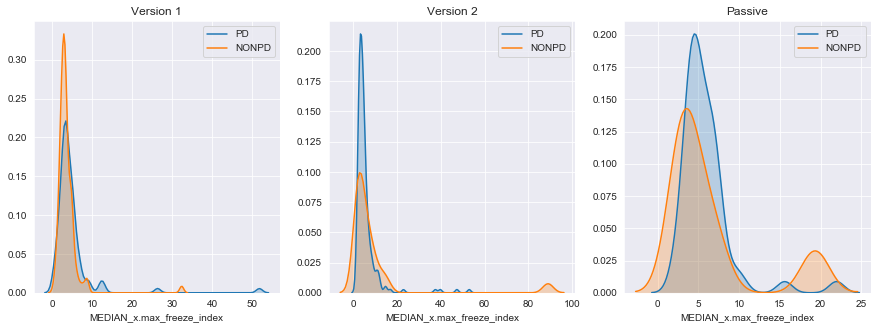

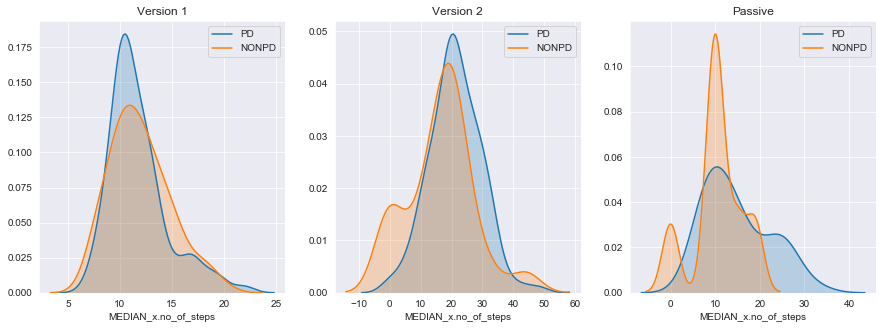

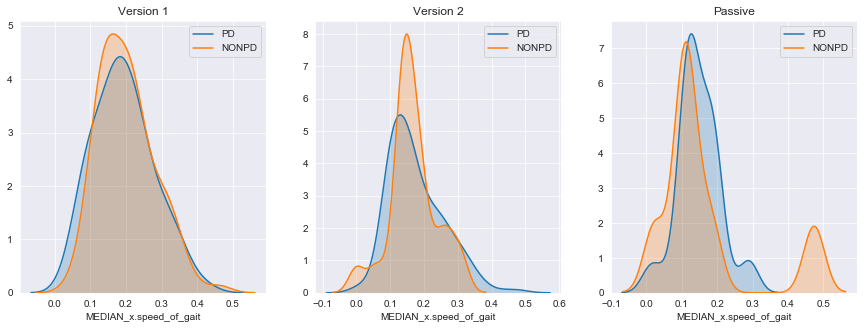

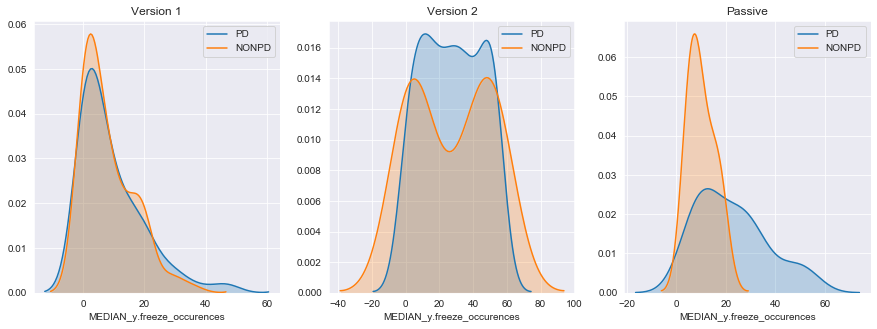

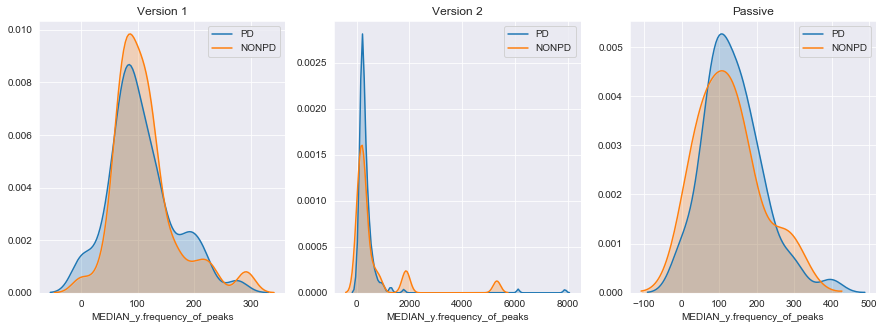

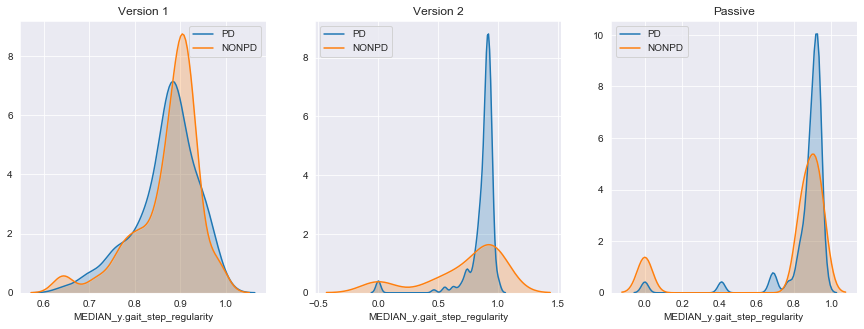

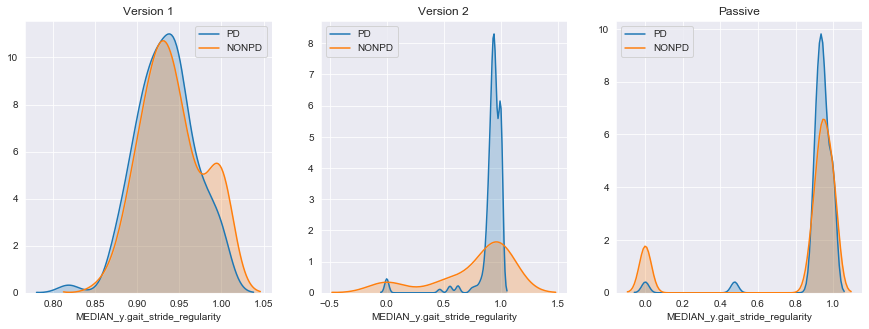

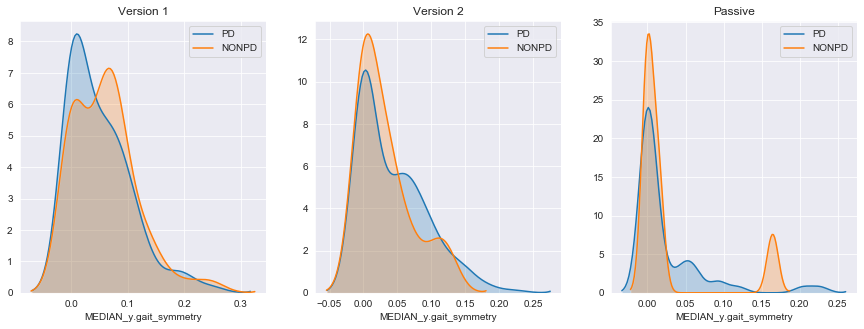

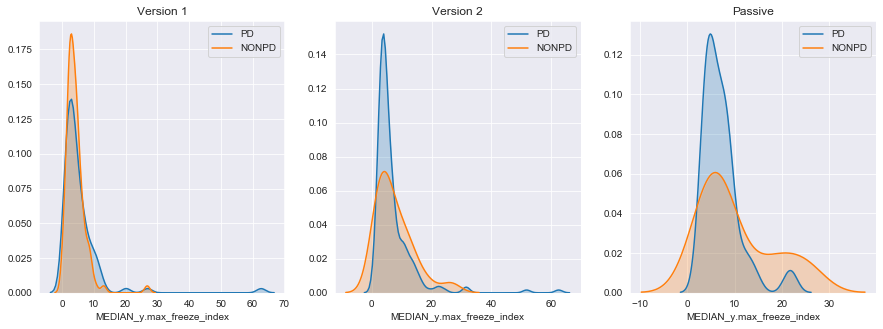

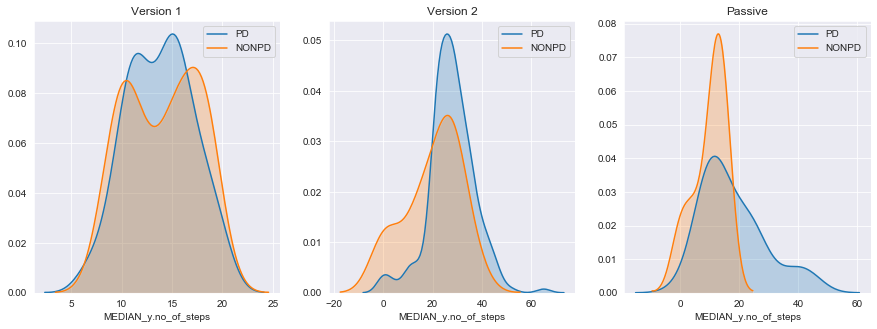

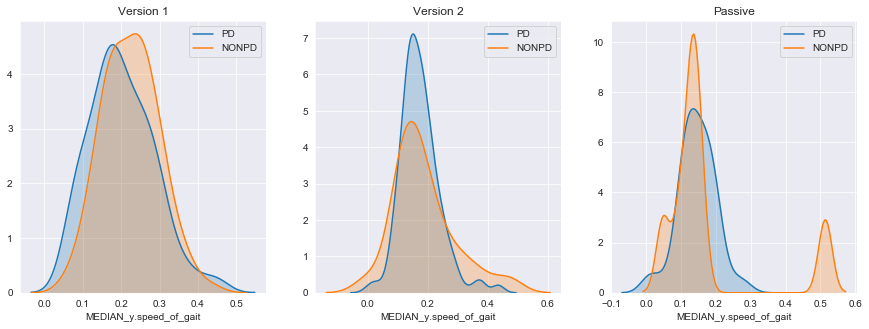

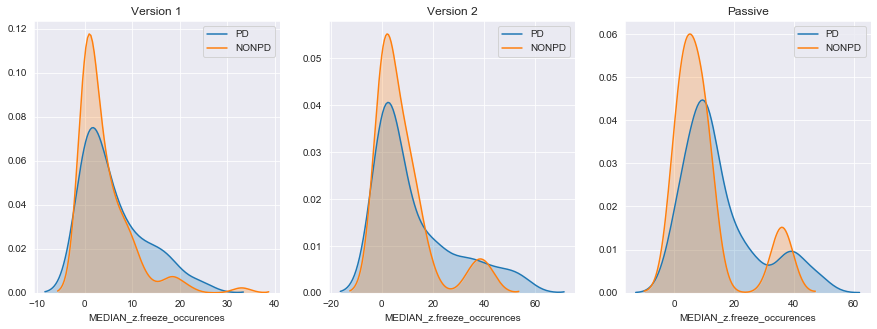

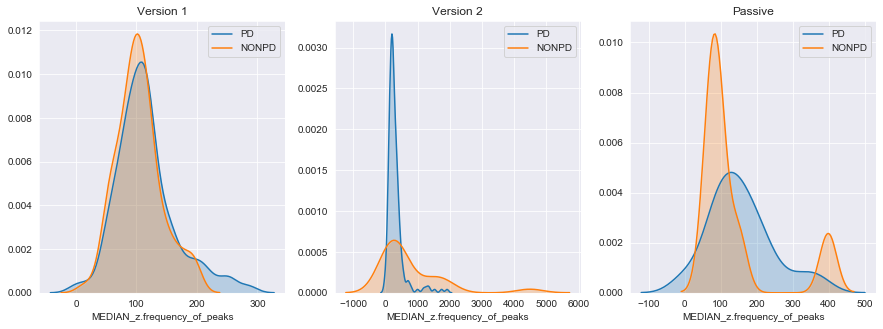

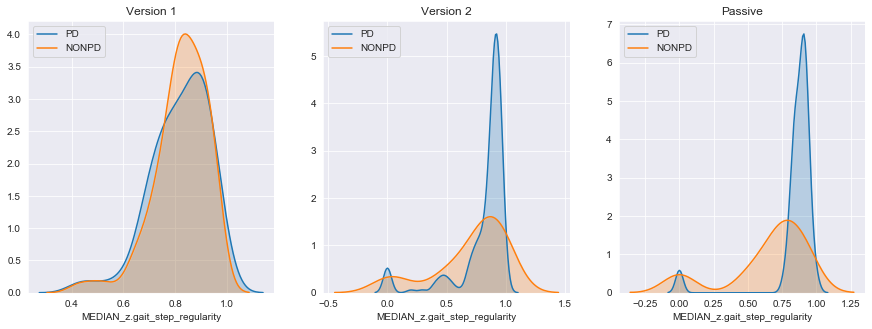

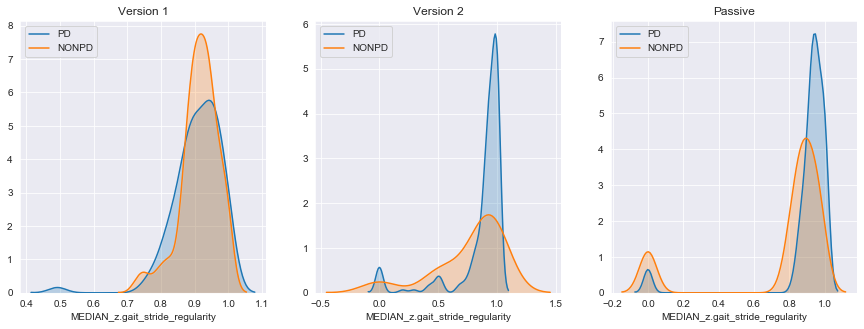

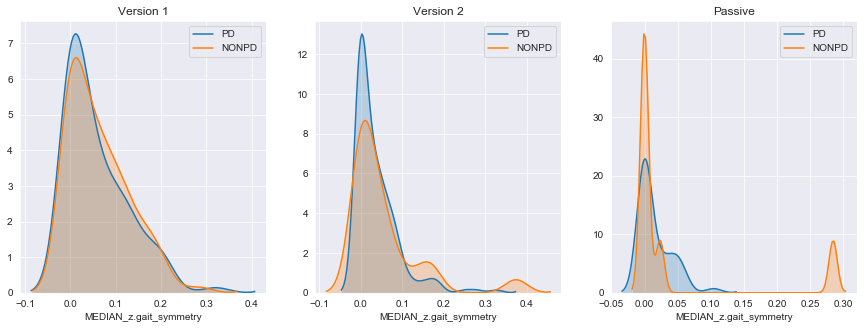

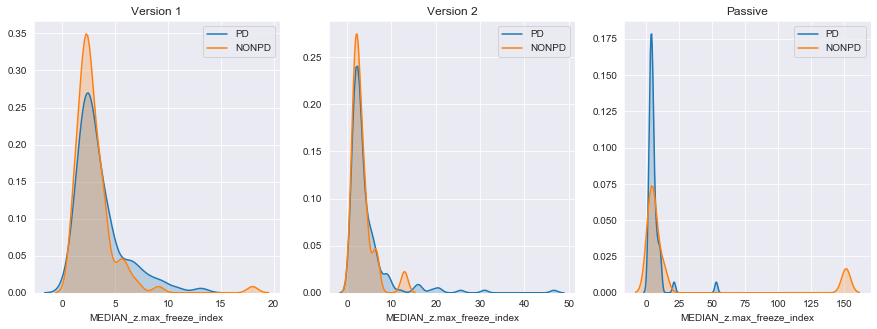

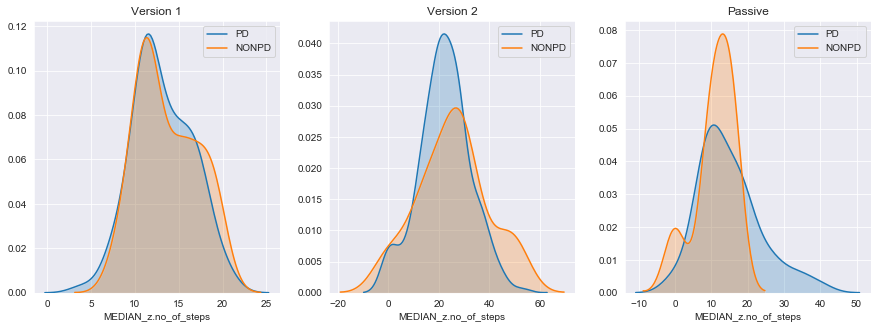

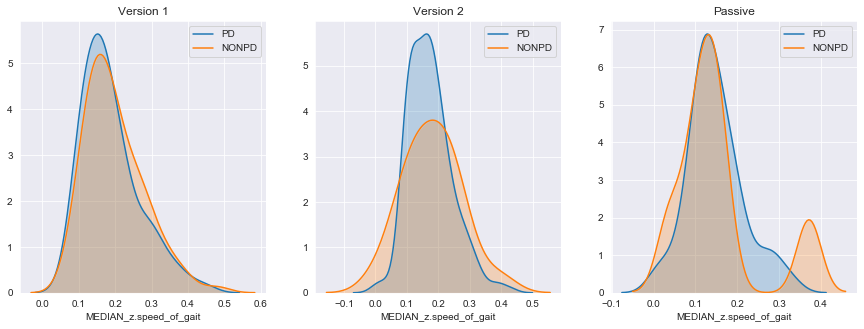

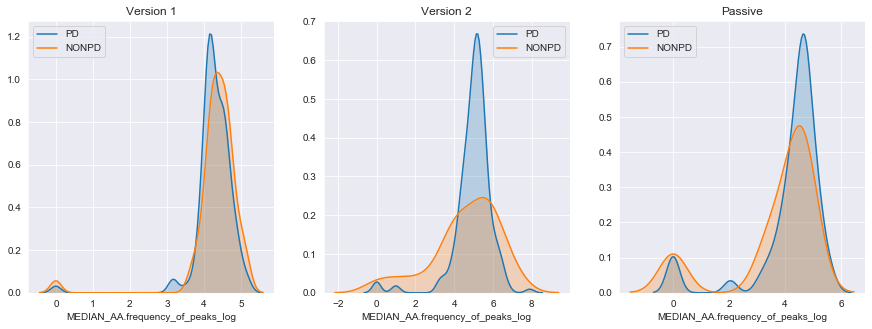

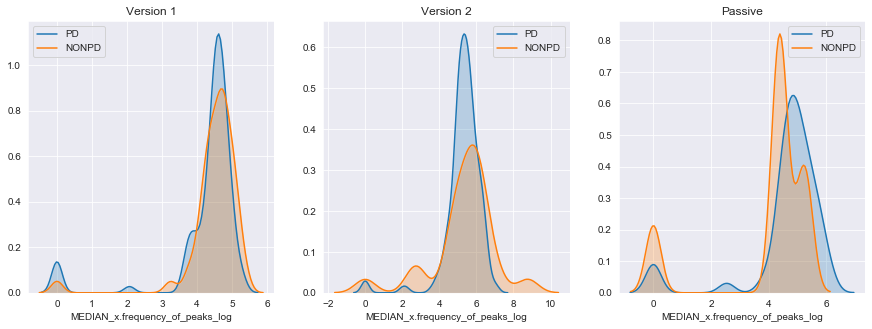

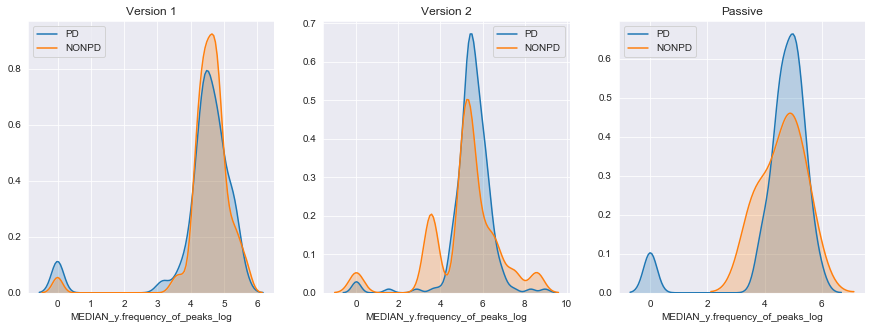

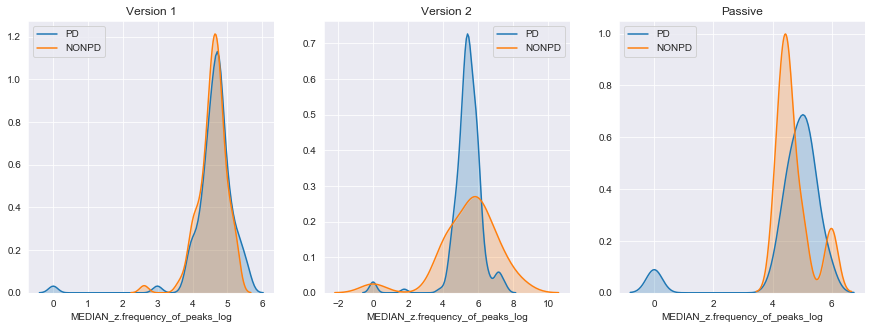

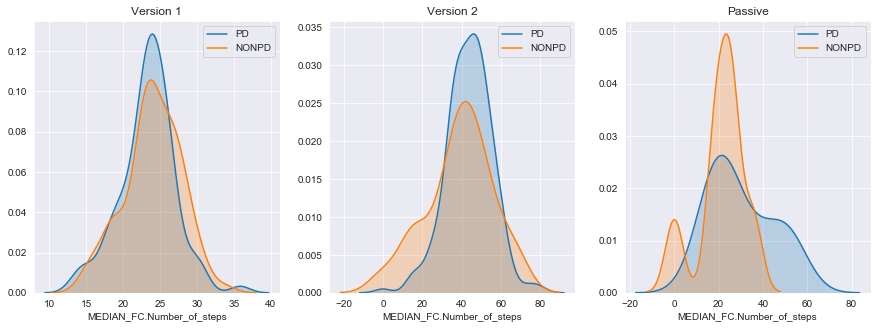

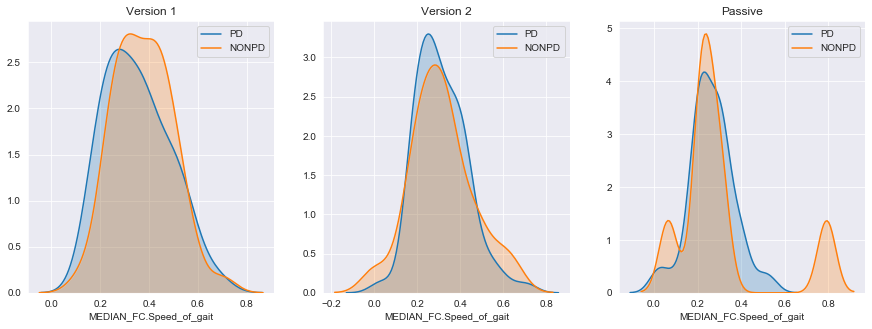

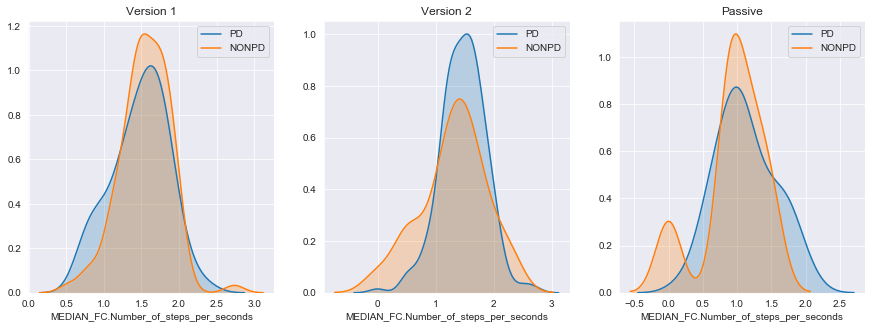

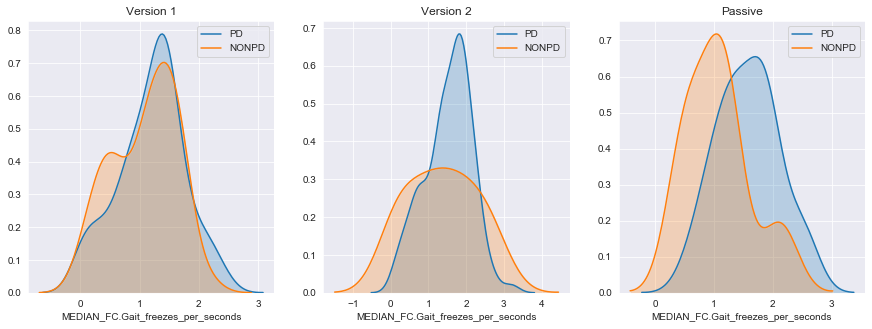

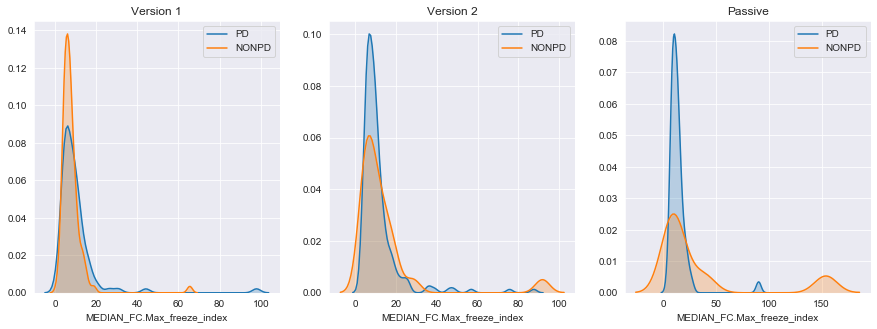

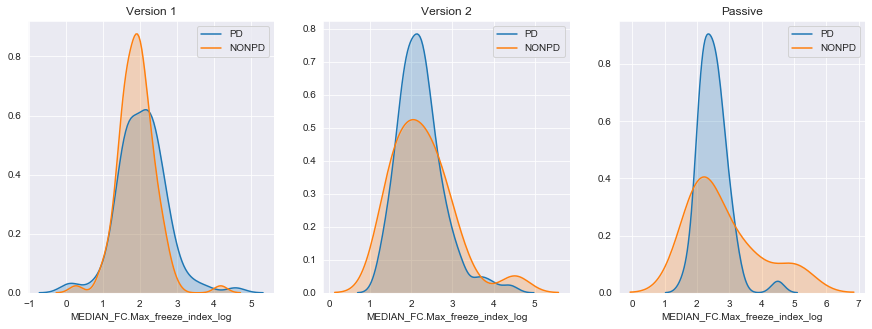

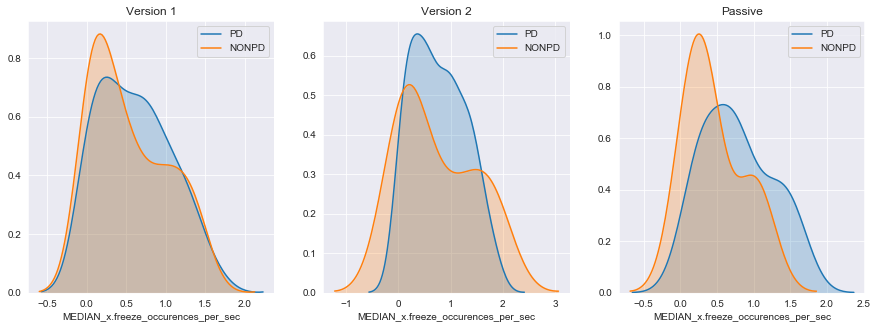

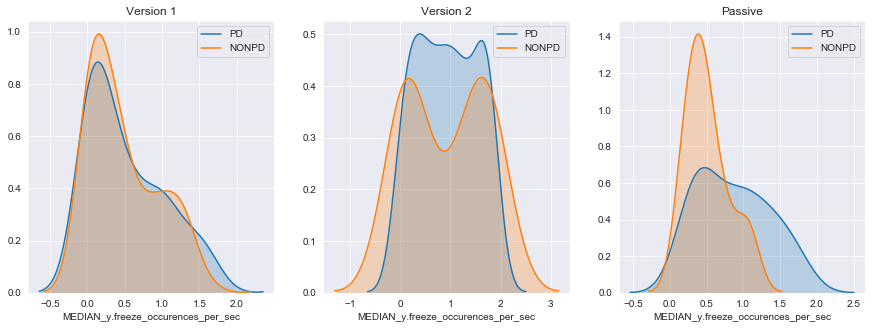

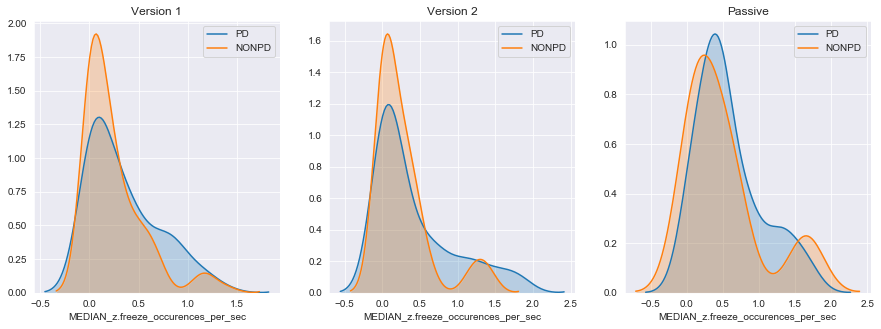

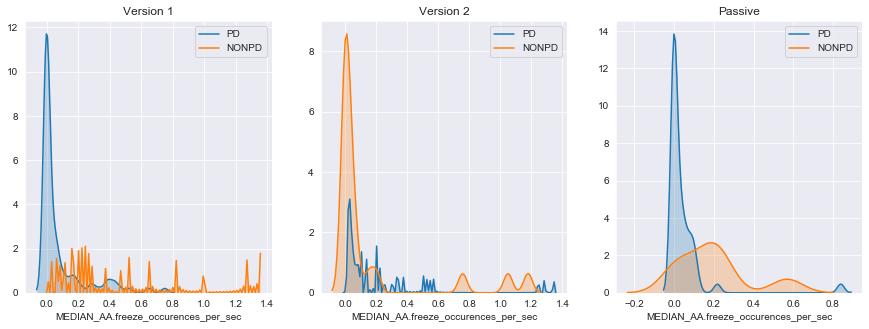

In [54]:
plot_PDvsNONPD_feature_distribution(median_grouped_data)